## New Simple QNLP Project 

based on Hazm

## Main Project

In [28]:
from hazm import POSTagger
tagger = POSTagger(model='resources/pos_tagger.model')
print(tagger.tag(['مرد', 'غذا', 'را', 'پخت']))

[('مرد', 'NOUN,EZ'), ('غذا', 'NOUN'), ('را', 'ADP'), ('پخت', 'VERB')]


### test with new Parser


In [29]:
# Hazm-based preprocessing
from preprocess_hazm import process_sentence

# جمله تست 1: فاعل + صفت + مفعول + صفت + فعل
sent1 = "مرد غذای خوشمزه را پخت"
labeled1 = process_sentence(sent1)
print("جمله 1:", sent1)
print("نتیجه:", labeled1)
print("\n")

# جمله تست 2: فاعل + صفت + مفعول + فعل
sent2 = "شخص ماهر غذای خوشمزه را پخت"
labeled2 = process_sentence(sent2)
print("جمله 2:", sent2)
print("نتیجه:", labeled2)
print("\n")

# جمله تست 3: فاعل + مفعول مرکب + فعل مرکب
sent3 = "مرد نرم افزار را اجرا کرد"
labeled3 = process_sentence(sent3)
print("جمله 3:", sent3)
print("نتیجه:", labeled3)


جمله 1: مرد غذای خوشمزه را پخت
نتیجه: [('مرد', 'subj'), ('غذای', 'obj'), ('خوشمزه', 'adj'), ('را', 'ra'), ('پخت', 'verb')]


جمله 2: شخص ماهر غذای خوشمزه را پخت
نتیجه: [('شخص', 'subj'), ('ماهر', 'adj'), ('غذای', 'obj'), ('خوشمزه', 'adj'), ('را', 'ra'), ('پخت', 'verb')]


جمله 3: مرد نرم افزار را اجرا کرد
نتیجه: [('مرد', 'subj'), ('نرم\u200cافزار', 'obj'), ('را', 'ra'), ('اجرا کرد', 'verb')]


In [30]:
from hazm import DependencyParser, POSTagger, word_tokenize

tagger = POSTagger(model='resources/pos_tagger.model')

sentence = "من به مدرسه رفتم ."
tokens = word_tokenize(sentence)
tagged = tagger.tag(tokens)

print("Tagged:", tagged)

Tagged: [('من', 'PRON'), ('به', 'ADP'), ('مدرسه', 'NOUN'), ('رفتم', 'VERB'), ('.', 'PUNCT')]


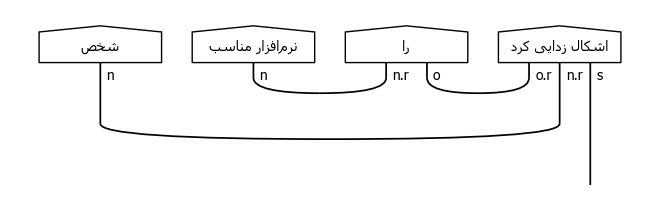

In [31]:
from persian_cat_parser import PersianCatParser
sent1 = "مرد غذا  را پخت"
sent1 = "مرد ماهر نرم افزار مناسب را اجرا کرد"
# sent1 = "مرد برنامه را اشکال زدایی کرد"

parser = PersianCatParser()
sent1 = "شخص نرم افزار مناسب را اشکال زدایی کرد"
diagram = parser.sentence2diagram(sent1)
diagram.draw()


Labeled tokens (token, role):
شخص -> subj
برنامه -> obj
را -> ra
اشکال زدایی کرد -> verb


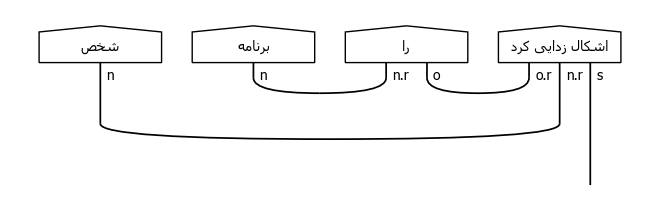


Tokens in diagram (display_text -> role):
شخص -> subj
برنامه -> obj
را -> ra
اشکال زدایی کرد -> verb


In [33]:
from persian_cat_parser import PersianCatParser, fix_persian
from preprocess_hazm import process_sentence

sentence = "شخص برنامه را اشکال زدایی کرد"
labeled = process_sentence(sentence)
print("Labeled tokens (token, role):")
for tok, role in labeled:
    print(f"{tok} -> {role}")

parser = PersianCatParser(verbose=True)
diagram = parser.sentence2diagram(sentence)

# تصویری نمودار
diagram.draw()   # اگر محیط گرافیکی داری

# بازرسی متنیِ توکن‌ها و نقش‌ها (حالا بدون خطا)
print("\nTokens in diagram (display_text -> role):")
for text, role in diagram.word_role_pairs:
    print(f"{text} -> {role}")

## the main persian project for ML learning

In [34]:
from persian_cat_parser import PersianCatParser
from preprocess_hazm import read_data

train_labels, train_data = read_data("datasets/mc_train_data.txt")   # label [t 1-t]
dev_labels, dev_data     = read_data("datasets/mc_dev_data.txt")
test_labels, test_data   = read_data("datasets/mc_test_data.txt")

parser = PersianCatParser(verbose=True)
# train_data = ["زن غذای خوشمزه را پخت."]     # test with a sentence with and without punctubations!
raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_dev_diagrams   = parser.sentences2diagrams(dev_data)
raw_test_diagrams  = parser.sentences2diagrams(test_data)

Sentence: مرد نرم افزار را اشکال زدایی کرد.


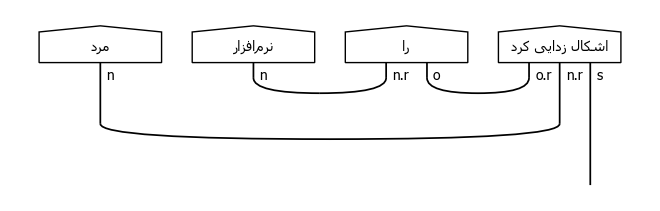

In [35]:
# انتخاب یک جمله و نمایش ان
idx = 17 
sent = train_data[idx]
# sent = dev_data[idx]
sent = test_data[idx]
# sent = "مرد غذای خوشمزه را پخت"

d = parser.sentence2diagram(sent)
print("Sentence:", sent)
# print("Diagram:", d)
d.draw()

### Create Diagram

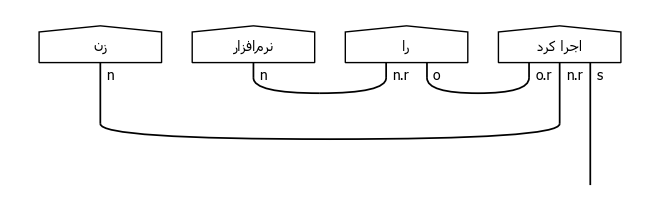

In [37]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# معرفی فونت فارسی
rcParams['font.family'] = 'Tahoma'   # یا مثلاً 'Vazirmatn' اگر نصب باشه
raw_train_diagrams[39].draw(size='18')
plt.show()

Sentence: زن نرم افزار را اجرا کرد.


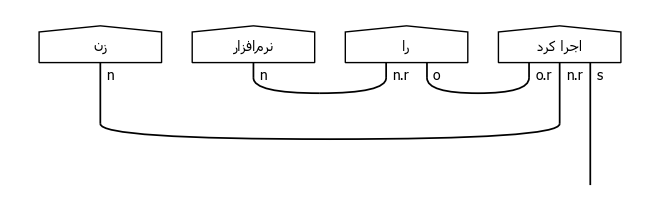

In [16]:
from persian_cat_parser import PersianCatParser
from preprocess import read_data

train_labels, train_data = read_data("datasets/mc_train_data.txt")   # label [t 1-t]
parser = PersianCatParser(verbose=True)
raw_train_diagrams = parser.sentences2diagrams(train_data)
idx = 39 
sent = train_data[idx]
d = parser.sentence2diagram(sent)
print("Sentence:", sent)
d.draw()

### Remove the Cups

### Create Circuits 

In [38]:
from lambeq import RemoveCupsRewriter 

remove_cups = RemoveCupsRewriter()
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams   = [remove_cups(diagram) for diagram in raw_dev_diagrams  ]
test_diagrams  = [remove_cups(diagram) for diagram in raw_test_diagrams ]
# train_diagrams[14].draw()

In [40]:
from lambeq import IQPAnsatz
from lambeq import AtomicType
from lambeq.backend.grammar import Ty
ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, Ty('o'):1}, n_layers=1, n_single_qubit_params=3)
train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits   = [ansatz(diagram) for diagram in dev_diagrams  ]
test_circuits  = [ansatz(diagram) for diagram in test_diagrams ]

In [41]:
# -------------------------------
# Backend and model
# -------------------------------
from lambeq import TketModel
from pytket.extensions.qiskit import AerBackend

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}
all_circuits = train_circuits + dev_circuits + test_circuits
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [42]:
# -------------------------------
# Training setup
# -------------------------------
from lambeq import BinaryCrossEntropyLoss
from lambeq import QuantumTrainer, SPSAOptimizer
import numpy as np

bce = BinaryCrossEntropyLoss()
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2

BATCH_SIZE = 60
EPOCHS = 140

trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A': 0.01 * EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose='text',
    seed=2,
)

In [16]:
# -------------------------------
# Prepare datasets
# -------------------------------
from lambeq import Dataset
train_dataset = Dataset(train_circuits, train_labels, batch_size=BATCH_SIZE)
val_dataset   = Dataset(dev_circuits, dev_labels, shuffle=False)

# Train
trainer.fit(train_dataset, val_dataset, log_interval=1)

Epoch 1:    train/loss: 1.2438   valid/loss: 0.7669   train/time: 29.07s   valid/time: 5.63s   train/acc: 0.4366   valid/acc: 0.5833
Epoch 2:    train/loss: 0.7384   valid/loss: 0.7645   train/time: 27.48s   valid/time: 5.89s   train/acc: 0.5211   valid/acc: 0.5500
Epoch 3:    train/loss: 2.5701   valid/loss: 1.4218   train/time: 27.62s   valid/time: 5.65s   train/acc: 0.6408   valid/acc: 0.4000
Epoch 4:    train/loss: 0.7876   valid/loss: 1.3607   train/time: 25.78s   valid/time: 5.23s   train/acc: 0.6761   valid/acc: 0.4000
Epoch 5:    train/loss: 0.7125   valid/loss: 1.2277   train/time: 25.98s   valid/time: 5.86s   train/acc: 0.5775   valid/acc: 0.4000
Epoch 6:    train/loss: 0.7287   valid/loss: 1.2161   train/time: 26.03s   valid/time: 5.93s   train/acc: 0.6761   valid/acc: 0.4333
Epoch 7:    train/loss: 0.6869   valid/loss: 1.0972   train/time: 27.93s   valid/time: 5.90s   train/acc: 0.6056   valid/acc: 0.5333
Epoch 8:    train/loss: 0.7669   valid/loss: 1.0794   train/time: 29.

In [19]:
test_acc = acc(model(test_circuits), test_labels)
print('Test accuracy:', test_acc)

Test accuracy: 0.7666666666666667


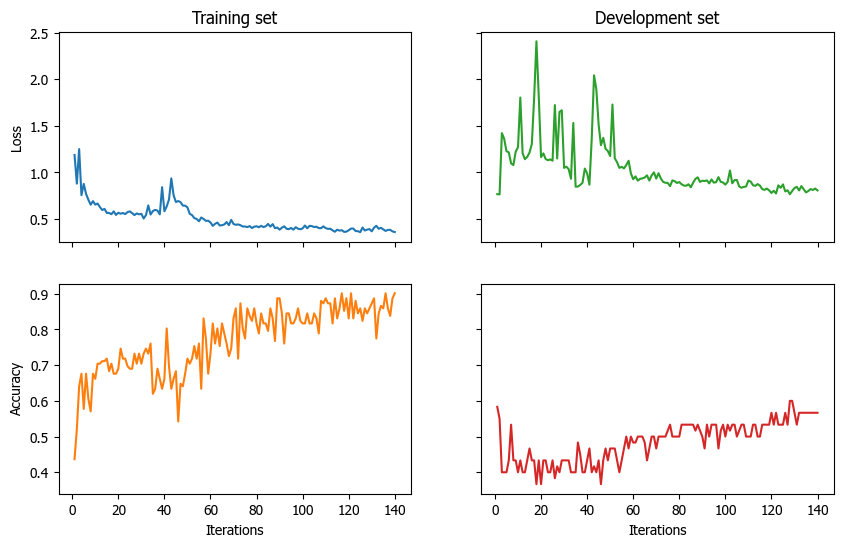

In [23]:
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')
colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs + 1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))


In [24]:
# -------------------------------
# Example: classify a new sentence
# -------------------------------
label_map = {0: "Food Class", 1: "IT Class"}
new_sentence = ["زن غذا را پخت"]   # safer than "He runs the code"

# Parse and simplify
new_diagram = remove_cups(parser.sentence2diagram(new_sentence[0]))

# Diagram -> circuit
new_circuit = ansatz(new_diagram)

# Prediction
prediction = model([new_circuit])
predicted_class = np.argmax(prediction, axis=1)[0]

print("Sentence:", new_sentence[0])
print("Prediction (raw):", prediction)
print("Predicted class:", label_map[predicted_class])

Sentence: زن غذا را پخت
Prediction (raw): [[0.61445783 0.38554217]]
Predicted class: Food Class


In [23]:
index=23
print(test_data[index])
print("\n")
print(model([test_circuits[index]]))
print("\n")
print(f"The Class is assigned to : {np.argmax(model([test_circuits[index]]))}")
print(f"The True Class Label is : {int(np.argmax(test_labels[index]))}")   # for food label is 1 so --> [1 0]

print("Label=0 is for Food class and Label=1 is for IT class")


زن ماهر شام را درست کرد.


[[0.30536913 0.69463087]]


The Class is assigned to : 1
The True Class Label is : 0
Label=0 is for Food class and Label=1 is for IT class


In [22]:
labels, sentences = read_data("datasets/mc_test_data.txt")
for i in range(5):
    print(sentences[i], labels[i])

زن شام خوشمزه را آماده کرد. [1, 0]
زن ماهر نرم افزار را اماده کرد. [0, 1]
مرد ماهر شام را آماده کرد. [1, 0]
زن ماهر سس را پخت. [1, 0]
زن برنامه مناسب را اجرا کرد [0, 1]
